In [1]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('paper', font_scale=1.1)
import pandas as pd
import warnings
import sys

warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from create_data_byreliability import GetData as gd

In [3]:
DirectoryName = '/Users/seetha/Box Sync/MultiDayData/Data/'
CombinedFolderName = '/Users/seetha/Box Sync/MultiDayData/PlaceCellResultsAll/'
SaveFolder = '/Users/seetha/Box Sync/MultiDayData/NetworkAnalysis/Allcells/'
SaveFigureFolder = '/Users/seetha/Box Sync/MultiDayData/MultiDayPaper/Figures/FigurepanelsPDF/Networkx/'

In [4]:
def plot_graph_factors_bytrack_iterated_csv(ax, filename, column_name):
    
    df_highrel = pd.read_csv(filename)
    df_highrel = df_highrel.rename(columns={df_highrel.columns[0]:'BinnedLocation'})
    df_highrel = df_highrel.drop([0, 1])
    
    mean_by_loc = pd.DataFrame()
    mean_by_loc['Location'] = df_highrel['BinnedLocation'].astype(int)
    if column_name == 'Degree':
        norm_mean = df_highrel['Degree'].astype(float)/df_highrel['Degree.2'].astype(int)
        mean_by_loc['Mean'] = norm_mean
    else:
        norm_mean = df_highrel[column_name].astype(float)
        mean_by_loc['Mean'] = norm_mean
    
    g  = mean_by_loc.groupby(by='Location').agg(['mean', 'sem'])
    ax.plot(np.arange(len(g)), g['Mean']['mean'])
    ax.fill_between(np.arange(len(g)), g['Mean']['mean']-g['Mean']['sem'], 
                    g['Mean']['mean']+g['Mean']['sem'], alpha=0.5)
    return g

In [14]:
def plot_graph_factors_byanimal_iterated_csv(ax, filename1, filename2, column_name):
    both_data = []
    for n, i in enumerate([filename1, filename2]):
        df_highrel = pd.read_csv(i)
        df_highrel = df_highrel.rename(columns={df_highrel.columns[0]:'AnimalName'})
        df_highrel = df_highrel.drop([0, 1])

        mean_by_loc = pd.DataFrame()
        mean_by_loc['AnimalName'] = df_highrel['AnimalName'].astype(str)
        if column_name == 'Degree':
            norm_mean = df_highrel['Degree'].astype(float)/df_highrel['Degree.2'].astype(int)                                                                
            mean_by_loc['Mean'] = norm_mean
        else:
            norm_mean = df_highrel[column_name].astype(float)
            mean_by_loc['Mean'] = norm_mean
            
        g  = mean_by_loc.groupby(by='AnimalName').mean()
        ci = scipy.stats.norm.interval(alpha=0.99, loc=np.mean(g['Mean']), scale=scipy.stats.sem(g['Mean']))
        ci = np.mean(g['Mean'])-ci[0]
        
#         print(g)
        ax.bar(n, np.mean(g['Mean']), yerr=ci)
        both_data.append(g['Mean'].to_numpy())
        
    for i1, i2 in zip(both_data[0], both_data[1]):
        ax.plot([0, 1], [i1, i2], 'ko-')

    t1, p = scipy.stats.ttest_rel(both_data[0], both_data[1]);
    print('t=%0.3f, p=%0.3f' %(t1, p))

## Location

In [15]:
na = gd(DirectoryName, CombinedFolderName)

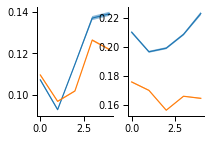

In [16]:
file1 = '/Users/seetha/Box Sync/MultiDayData/NetworkAnalysis/Allcells_subsampled/Task1_Task2/by_location_iterated.csv'
file2 = '/Users/seetha/Box Sync/MultiDayData/NetworkAnalysis/Allcells_subsampled/Task3_Task4/by_location_iterated.csv'

fs, ax = plt.subplots(1, 2)
plot_graph_factors_bytrack_iterated_csv(ax[0], file1, column_name='Degree')
plot_graph_factors_bytrack_iterated_csv(ax[0], file2, column_name='Degree')

plot_graph_factors_bytrack_iterated_csv(ax[1], file1, column_name='Clustering')
plot_graph_factors_bytrack_iterated_csv(ax[1], file2, column_name='Clustering')

# ax[0].set_ylim((0.07, 0.25))
# ax[1].set_ylim((0.1, 0.4))
sns.despine(fs)
fs.set_size_inches((3, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Deg_CC_bytrack_subsampledbylocation_Task1.pdf'), bbox_inches='tight')

t=0.160, p=0.880
t=7.909, p=0.001


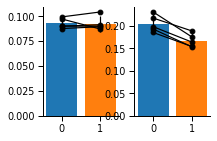

In [17]:
file1 = '/Users/seetha/Box Sync/MultiDayData/NetworkAnalysis/Allcells_subsampled/Task1_Task2/by_animal_iterated.csv'
file2 = '/Users/seetha/Box Sync/MultiDayData/NetworkAnalysis/Allcells_subsampled/Task3_Task4/by_animal_iterated.csv'

fs, ax = plt.subplots(1, 2)
plot_graph_factors_byanimal_iterated_csv(ax[0], file1, file2, column_name='Degree')
plot_graph_factors_byanimal_iterated_csv(ax[1], file1, file2, column_name='Clustering')

# ax[0].set_ylim((0, 0.25))
# ax[1].set_ylim((0, 0.4))
sns.despine(fs)
fs.set_size_inches((3, 2))
# fs.savefig(os.path.join(SaveFigureFolder, 'Deg_CC_bytrack_subsampledbyloction_Task1.pdf'), bbox_inches='tight')